In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1, 0.1], [0.1, 1.2]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape, dist_02.shape


(500, 2) (500, 2)


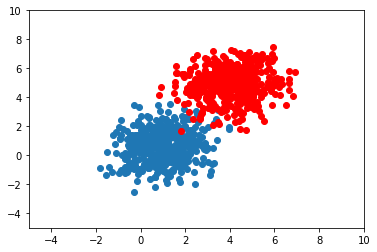

In [15]:
plt.figure(0) #Default is also figure(0)

plt.xlim(-5, 10)
plt.ylim(-5, 10)

plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1], color = 'red')


plt.show()

In [23]:
r = dist_01.shape[0] + dist_02.shape[0]
c = dist_01.shape[1] + 1 # +1 for label column

data = np.zeros((r, c))
print data.shape

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0

print data.mean(axis = 0)

(1000, 3)


In [35]:
np.random.shuffle(data)
print data[:10] #data head

[[ 2.29999765  1.38158222  0.        ]
 [ 3.19905791  5.26682606  1.        ]
 [ 5.69968428  5.0424859   1.        ]
 [ 3.12398101 -1.36917879  0.        ]
 [ 3.92747676  3.88499888  1.        ]
 [-0.37681135  0.48055173  0.        ]
 [-0.27310242 -2.51358527  0.        ]
 [ 3.27743379  5.07567696  1.        ]
 [ 3.21722357  5.08898324  1.        ]
 [ 3.67948716  3.05597333  1.        ]]


In [42]:
def distance(x1, x2):
    d = (x1 - x2)**2
    d = d.sum()
    d = np.sqrt(d)
    return d
#print distance(np.array([0,0]), np.array([1,1])) 

def knn(x_train, y_train, xt, k=7):
    vals =[]
    
    for ix in range(x_train.shape[0]):
        d = distance(x_train[ix], xt)
        vals.append([d, y_train[ix]])
        
    sorted_labels = sorted(vals, key = lambda z: z[0])
    neighbours = np.asarray(sorted_labels)[:k, -1]
    
    freq = np.unique(neighbours, return_counts = True)
    
    return freq[0][freq[1].argmax()]

In [43]:
split = int(0.75 * data.shape[0])

train_data_x = data[:split, :2]
train_data_y = data[:split, -1]

test_data_x = data[split:, :2]
test_data_y = data[split:, -1]

print train_data_x.shape, train_data_y.shape
print test_data_x.shape, test_data_y.shape

(750, 2) (750,)
(250, 2) (250,)


In [47]:
def get_accuracy(kx):
    preds = []

    for ix in range(test_data_x.shape[0]):
        preds.append(knn(train_data_x, train_data_y, test_data_x[ix], k =kx))
    preds = np.asarray(preds)

    return 100*float((test_data_y == preds).sum())/ preds.shape[0]
print get_accuracy(7)

99.2


In [48]:
for ix in range(2, 15):
    print 'k:', ix, '|| Accuracy:',get_accuracy(ix) 

k: 2 || Accuracy: 98.0
k: 3 || Accuracy: 98.8
k: 4 || Accuracy: 98.4
k: 5 || Accuracy: 99.2
k: 6 || Accuracy: 99.2
k: 7 || Accuracy: 99.2
k: 8 || Accuracy: 99.2
k: 9 || Accuracy: 99.2
k: 10 || Accuracy: 98.8
k: 11 || Accuracy: 98.8
k: 12 || Accuracy: 98.8
k: 13 || Accuracy: 98.8
k: 14 || Accuracy: 98.8
